Project for MSCI446 W24
Group 38
Members: Gonzalo Carretero, ...

Overview:
In this notebook, we will explore a dataset containing various information regarding the bike rental demand in the city of Seoul, South Korea, throughout a year.

Main project type: Supervised learning -> Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Inline plotting
%matplotlib inline

In [18]:
bike_data = pd.read_csv('SeoulBikeData.csv', encoding='latin1')

bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### DATA PREPROCESSING

We will follow the following steps:
- 1. Dealing with missing values
- 2. Dealing with duplicates
- 3. Dealing with categorical data
- 4. Dealing with Outliers
- 5. Partitioning the data set
- 6. Feature scaling
- 7. Data visualization

#### Mising Values

In [5]:
# Check for missing values
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There appears to be no missing values

#### Duplicates

In [6]:
# Find duplicate rows
bike_data.duplicated().sum()

0

There appears to be no duplicate values

#### Categorical Data

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We need to deal with:
Date, Seasons, Holiday and Functioning Day

In [19]:
"""
Date: The date format given is not valuable to us per se when it comes to predicting rental. 
Some aspects that perhaps are relevant are the separate months, days of the months and days of the weeks. 
We will add those columns encoded and drop the date column.
"""

bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')
bike_data['Month'] = bike_data['Date'].dt.month
bike_data['Day'] = bike_data['Date'].dt.day
bike_data['Day_of_week'] = bike_data['Date'].dt.dayofweek
# New tabe without the Date column
bike_data = bike_data.drop(columns='Date')
bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Day_of_week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4


In [20]:
"""
For Seasons, we will use nominal encoding, in particular one-hot encoding
"""
indicator = pd.get_dummies(bike_data['Seasons'])
bike_data = bike_data.join(indicator)
bike_data = bike_data.drop(columns='Seasons')
bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Day,Day_of_week,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,4,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,4,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,12,1,4,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,4,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,12,1,4,0,0,0,1


In [21]:
"""
For holiday, we will use nominal encoding:
Holiday No: 0
Holiday Yes: 1
"""

bike_data['Holiday'] = bike_data['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
bike_data.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Day,Day_of_week,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,Yes,12,1,4,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,Yes,12,1,4,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,Yes,12,1,4,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,Yes,12,1,4,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,Yes,12,1,4,0,0,0,1


In [24]:
# We saw that on non-functioning days, there are no bikes rented
print(bike_data[(bike_data['Functioning Day'] == 'No') & (bike_data['Rented Bike Count'] > 0)])

Empty DataFrame
Columns: [Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Holiday, Functioning Day, Month, Day, Day_of_week, Autumn, Spring, Summer, Winter]
Index: []


In [25]:
# We will drop the non-functioning days since they don't require prediction
bike_data = bike_data[bike_data['Functioning Day'] == 'Yes']

# We will drop the Functioning Day column
bike_data = bike_data.drop(columns='Functioning Day')

bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Month,Day,Day_of_week,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,12,1,4,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,12,1,4,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,12,1,4,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,12,1,4,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,12,1,4,0,0,0,1


#### Outliers

In [26]:
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Month,Day,Day_of_week,Autumn,Spring,Summer,Winter
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,0.048198,6.438984,15.840992,3.009687,0.228825,0.255168,0.260839,0.255168
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,0.214198,3.452362,8.767785,2.008583,0.420101,0.435982,0.439118,0.435982
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,0.000000,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,0.000000,6.000000,16.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,0.000000,9.000000,23.000000,5.000000,0.000000,1.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000,1.000000,12.000000,31.000000,6.000000,1.000000,1.000000,1.000000,1.000000


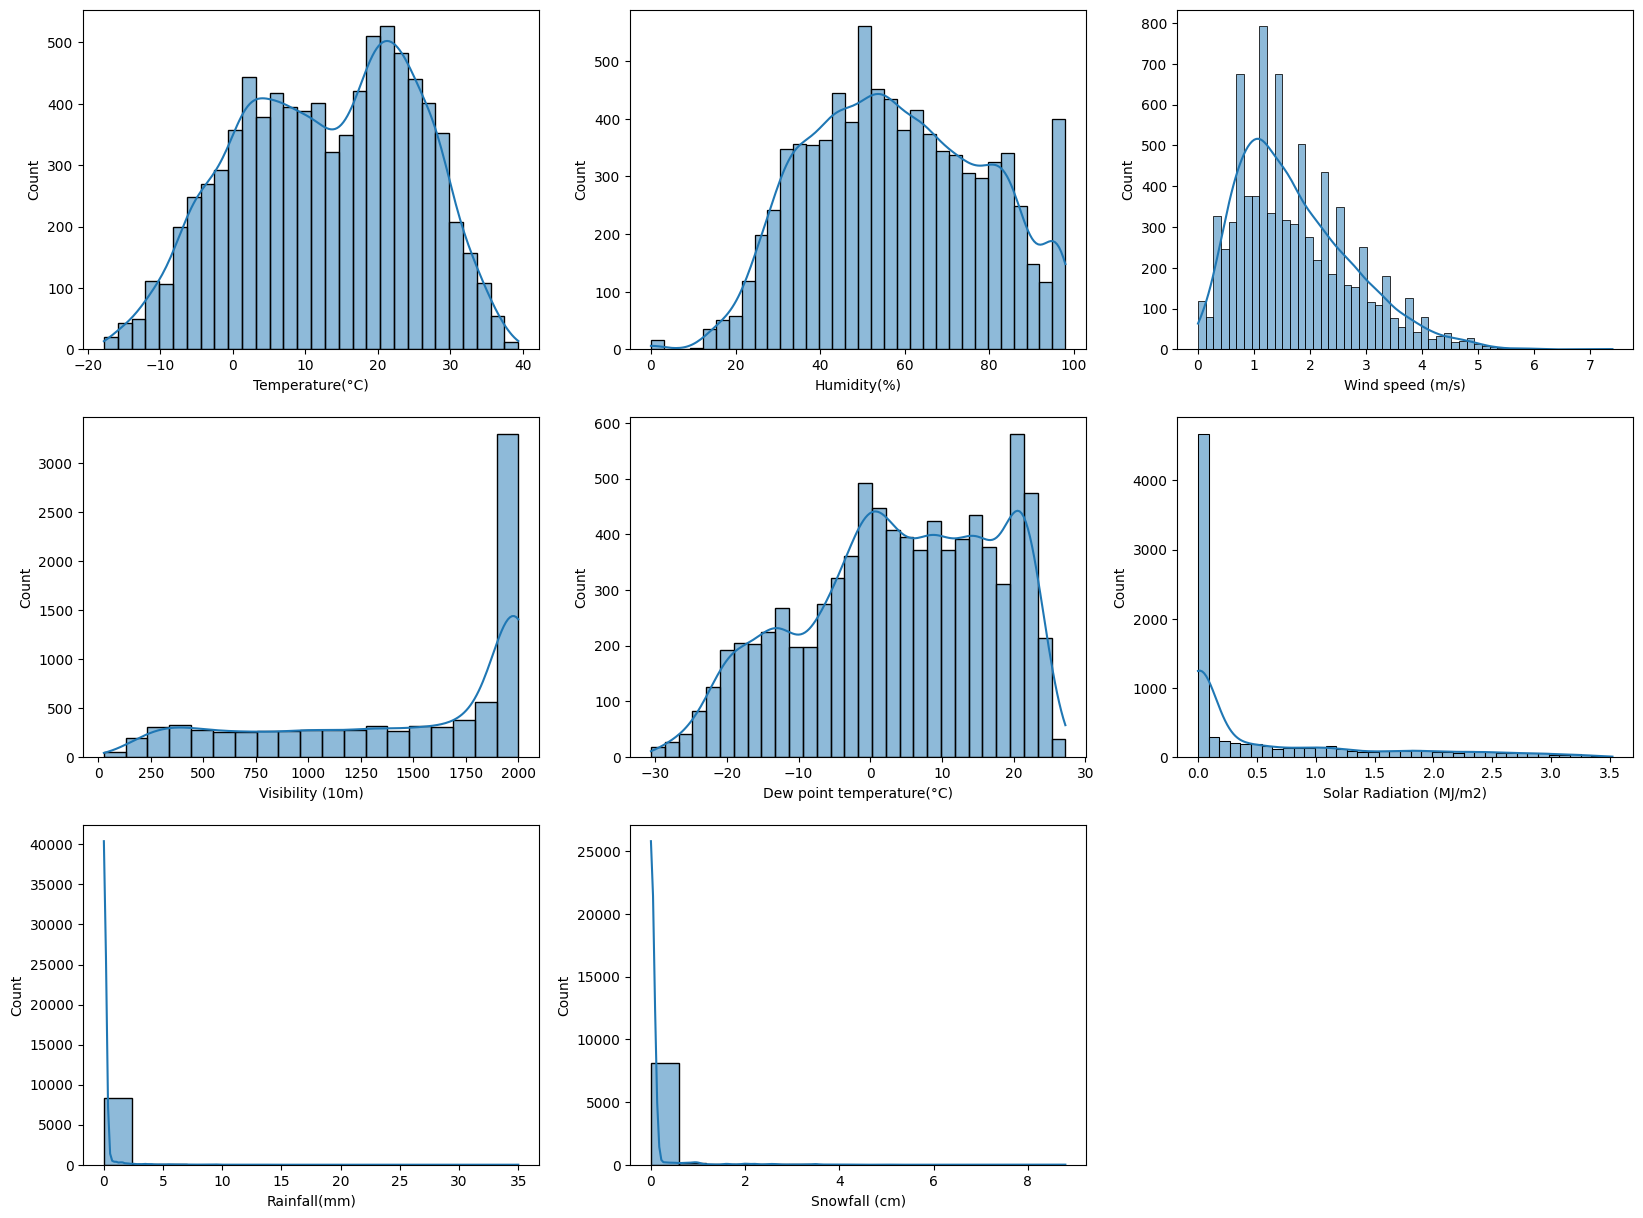

In [27]:
"""
Let's check for outliers
"""

# Histograms of Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar radiation, Rainfall, Snowfall
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.histplot(bike_data['Temperature(°C)'], kde=True)
plt.subplot(3, 3, 2)
sns.histplot(bike_data['Humidity(%)'], kde=True)
plt.subplot(3, 3, 3)
sns.histplot(bike_data['Wind speed (m/s)'], kde=True)
plt.subplot(3, 3, 4)
sns.histplot(bike_data['Visibility (10m)'], kde=True)
plt.subplot(3, 3, 5)
sns.histplot(bike_data['Dew point temperature(°C)'], kde=True)
plt.subplot(3, 3, 6)
sns.histplot(bike_data['Solar Radiation (MJ/m2)'], kde=True)
plt.subplot(3, 3, 7)
sns.histplot(bike_data['Rainfall(mm)'], kde=True)
plt.subplot(3, 3, 8)
sns.histplot(bike_data['Snowfall (cm)'], kde=True)
plt.show()


In [28]:
"""
Since the following columns are normal enough, we will cap the outliers:
- Temperature(°C)
- Humidity(%)
- Wind speed (m/s)
"""
# We will define the outliers as the values that are 3 standard deviations away from the mean
temp = bike_data['Temperature(°C)']
humidity = bike_data['Humidity(%)']
wind_speed = bike_data['Wind speed (m/s)']

temp_mean = temp.mean()
temp_std = temp.std()
temp_outliers = temp[(temp < temp_mean - 3 * temp_std) | (temp > temp_mean + 3 * temp_std)]
print("Temperature outliers:", temp_outliers)

humidity_mean = humidity.mean()
humidity_std = humidity.std()
humidity_outliers = humidity[(humidity < humidity_mean - 3 * humidity_std) | (humidity > humidity_mean + 3 * humidity_std)]
print("Humidity outliers:", humidity_outliers)

wind_speed_mean = wind_speed.mean()
wind_speed_std = wind_speed.std()
wind_speed_outliers = wind_speed[(wind_speed < wind_speed_mean - 3 * wind_speed_std) | (wind_speed > wind_speed_mean + 3 * wind_speed_std)]
print("Wind speed outliers:", wind_speed_outliers)

# Cap the outliers
temp = temp.clip(lower=temp_mean - 3 * temp_std, upper=temp_mean + 3 * temp_std)
humidity = humidity.clip(lower=humidity_mean - 3 * humidity_std, upper=humidity_mean + 3 * humidity_std)
wind_speed = wind_speed.clip(lower=wind_speed_mean - 3 * wind_speed_std, upper=wind_speed_mean + 3 * wind_speed_std)

bike_data['Temperature(°C)'] = temp
bike_data['Humidity(%)'] = humidity
bike_data['Wind speed (m/s)'] = wind_speed


Temperature outliers: Series([], Name: Temperature(°C), dtype: float64)
Humidity outliers: Series([], Name: Humidity(%), dtype: int64)
Wind speed outliers: 85      5.4
87      5.8
89      5.3
249     5.1
253     5.1
       ... 
7835    5.0
7916    5.4
7932    4.9
7937    5.7
7985    4.9
Name: Wind speed (m/s), Length: 62, dtype: float64


--------------------------- Below this is going to be modified -----------------------

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: title={'center': 'Snowfall (cm)'}>, <Axes: >, <Axes: >]],
      dtype=object)

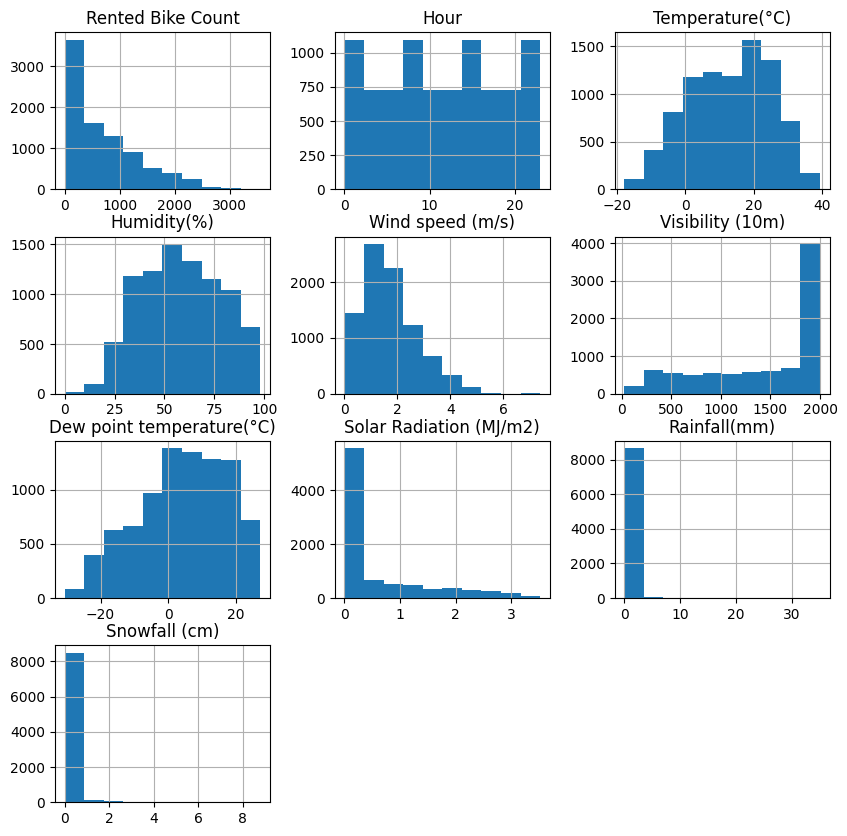

In [14]:
bike_data.hist(figsize=(10, 10))

<Axes: >

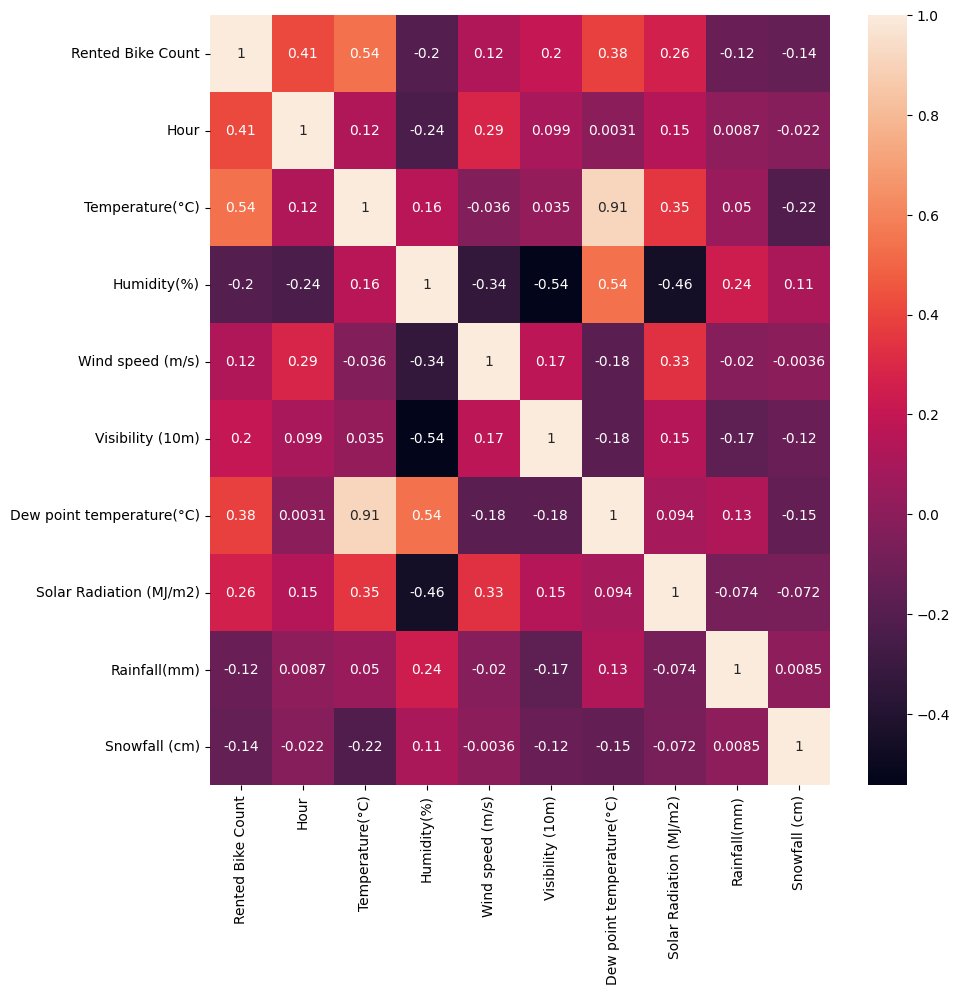

In [19]:
plt.figure(figsize=(10, 10))
good = bike_data.drop(['Date','Functioning Day', 'Seasons', 'Holiday'], axis=1)
sns.heatmap(good.corr(), annot=True)

array([[<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>]], dtype=object)

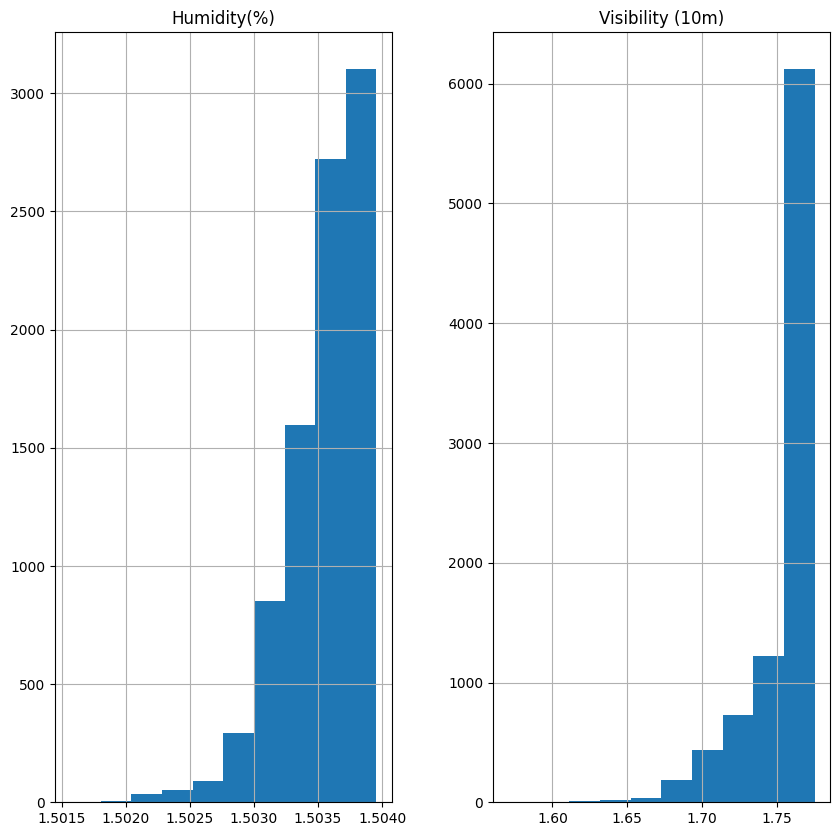

In [28]:
good['Humidity(%)'] = np.sqrt(good['Humidity(%)'] + 1)
good['Visibility (10m)'] = np.sqrt(good['Visibility (10m)'] + 1)
good[['Humidity(%)', 'Visibility (10m)']].hist(figsize=(10, 10))

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

good_good = good.dropna()

x = good_good.drop(['Rented Bike Count'], axis=1)
y = good_good['Rented Bike Count']



In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.4777004760271144

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.7727181960467946

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

grid = GridSearchCV(forest, param_grid=param_grid, cv=3)
grid.fit(x_train, y_train)
grid.best_params_
grid.best_score_

0.7621509362249931